# Exploratory Analysis Lesson

In [1]:
import pandas as pd
import numpy as np
from env import get_connection
import seaborn as sns
import matplotlib.pyplot as plt
from pydataset import data
import os

#turn off the pink warning boxes
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import acquire
import prepare

from env import get_connection
pd.options.display.max_columns = None

In [2]:
taxis = sns.load_dataset('taxis')

In [3]:
taxis

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [4]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pickup           6433 non-null   object 
 1   dropoff          6433 non-null   object 
 2   passengers       6433 non-null   int64  
 3   distance         6433 non-null   float64
 4   fare             6433 non-null   float64
 5   tip              6433 non-null   float64
 6   tolls            6433 non-null   float64
 7   total            6433 non-null   float64
 8   color            6433 non-null   object 
 9   payment          6389 non-null   object 
 10  pickup_zone      6407 non-null   object 
 11  dropoff_zone     6388 non-null   object 
 12  pickup_borough   6407 non-null   object 
 13  dropoff_borough  6388 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 703.7+ KB


In [5]:
taxis.describe().T

,count,mean,std,min,25%,50%,75%,max
passengers,6433.0,1.539251,1.203768,0.0,1.00,1.00,2.00,6.00
distance,6433.0,3.024617,3.827867,0.0,0.98,1.64,3.21,36.70
fare,6433.0,13.091073,11.551804,1.0,6.50,9.50,15.00,150.00
tip,6433.0,1.979220,2.448560,0.0,0.00,1.70,2.80,33.20
tolls,6433.0,0.325273,1.415267,0.0,0.00,0.00,0.00,24.02
total,6433.0,18.517794,13.815570,1.3,10.80,14.16,20.30,174.82


In [6]:
taxis = taxis.drop(columns=['pickup', 'dropoff', 'pickup_zone', 'dropoff_zone'], axis=1)

In [7]:
taxis.describe()

,passengers,distance,fare,tip,tolls,total
count,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
std,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570
min,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000


In [8]:
taxis.isnull().sum()

passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_borough     26
dropoff_borough    45
dtype: int64

In [9]:
taxis = taxis.dropna()

In [10]:
taxis.isnull().sum()

passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_borough     0
dropoff_borough    0
dtype: int64

In [11]:
dummy_df = pd.get_dummies(taxis[['color', 'payment', 'pickup_borough', 'dropoff_borough']], drop_first=True)

In [12]:
dummy_df

,color_yellow,payment_credit card,pickup_borough_Brooklyn,pickup_borough_Manhattan,pickup_borough_Queens,dropoff_borough_Brooklyn,dropoff_borough_Manhattan,dropoff_borough_Queens,dropoff_borough_Staten Island
0,1,1,0,1,0,0,1,0,0
1,1,0,0,1,0,0,1,0,0
2,1,1,0,1,0,0,1,0,0
3,1,1,0,1,0,0,1,0,0
4,1,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
6428,0,1,0,1,0,0,1,0,0
6429,0,1,0,0,1,0,0,0,0
6430,0,0,1,0,0,1,0,0,0
6431,0,1,1,0,0,1,0,0,0


In [13]:
taxis = pd.concat([taxis, dummy_df], axis=1)

In [14]:
taxis.head()

,passengers,distance,fare,tip,tolls,total,color,payment,pickup_borough,dropoff_borough,color_yellow,payment_credit card,pickup_borough_Brooklyn,pickup_borough_Manhattan,pickup_borough_Queens,dropoff_borough_Brooklyn,dropoff_borough_Manhattan,dropoff_borough_Queens,dropoff_borough_Staten Island
0,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Manhattan,Manhattan,1,1,0,1,0,0,1,0,0
1,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Manhattan,Manhattan,1,0,0,1,0,0,1,0,0
2,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Manhattan,Manhattan,1,1,0,1,0,0,1,0,0
3,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Manhattan,Manhattan,1,1,0,1,0,0,1,0,0
4,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Manhattan,Manhattan,1,1,0,1,0,0,1,0,0


In [15]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6341 entries, 0 to 6432
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   passengers                     6341 non-null   int64  
 1   distance                       6341 non-null   float64
 2   fare                           6341 non-null   float64
 3   tip                            6341 non-null   float64
 4   tolls                          6341 non-null   float64
 5   total                          6341 non-null   float64
 6   color                          6341 non-null   object 
 7   payment                        6341 non-null   object 
 8   pickup_borough                 6341 non-null   object 
 9   dropoff_borough                6341 non-null   object 
 10  color_yellow                   6341 non-null   uint8  
 11  payment_credit card            6341 non-null   uint8  
 12  pickup_borough_Brooklyn        6341 non-null   u

In [16]:
taxis = taxis.rename(columns={'payment_credit card':'payment_credit_card',
                              'dropoff_borough_Staten Island':'dropoff_borough_staten_island'})

In [17]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6341 entries, 0 to 6432
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   passengers                     6341 non-null   int64  
 1   distance                       6341 non-null   float64
 2   fare                           6341 non-null   float64
 3   tip                            6341 non-null   float64
 4   tolls                          6341 non-null   float64
 5   total                          6341 non-null   float64
 6   color                          6341 non-null   object 
 7   payment                        6341 non-null   object 
 8   pickup_borough                 6341 non-null   object 
 9   dropoff_borough                6341 non-null   object 
 10  color_yellow                   6341 non-null   uint8  
 11  payment_credit_card            6341 non-null   uint8  
 12  pickup_borough_Brooklyn        6341 non-null   u

In [18]:
num_vars = taxis.select_dtypes(include=['int64', 'float'])

In [19]:
cat_vars = taxis.select_dtypes(include=['object', 'uint8'])

In [24]:
train, validate, test = prepare.split_train_test(taxis, 'color')

color
yellow    3761
green      677
Name: color, dtype: int64
yellow    84.745381
green     15.254619
Name: color, dtype: float64


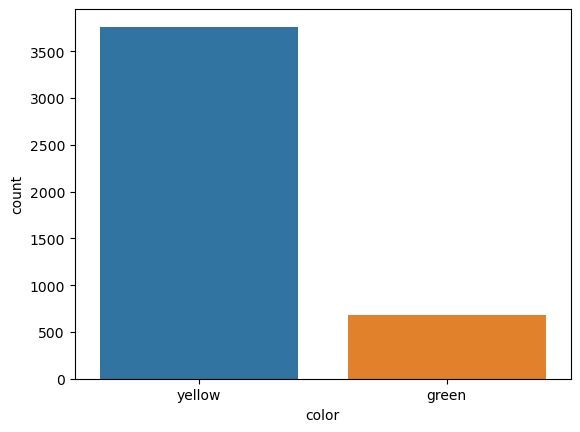

payment
credit card    3171
cash           1267
Name: payment, dtype: int64
credit card    71.451104
cash           28.548896
Name: payment, dtype: float64


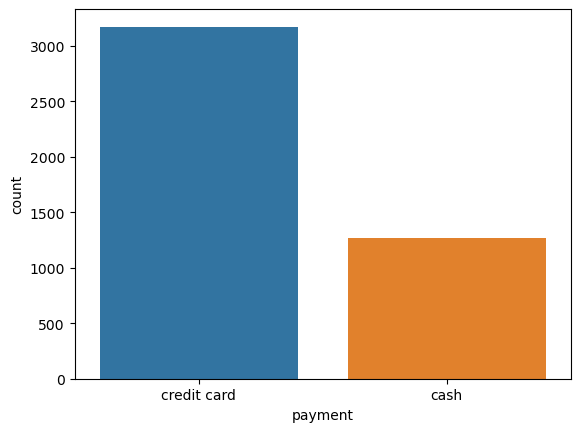

pickup_borough
Manhattan    3655
Queens        454
Brooklyn      258
Bronx          71
Name: pickup_borough, dtype: int64
Manhattan    82.356918
Queens       10.229833
Brooklyn      5.813429
Bronx         1.599820
Name: pickup_borough, dtype: float64


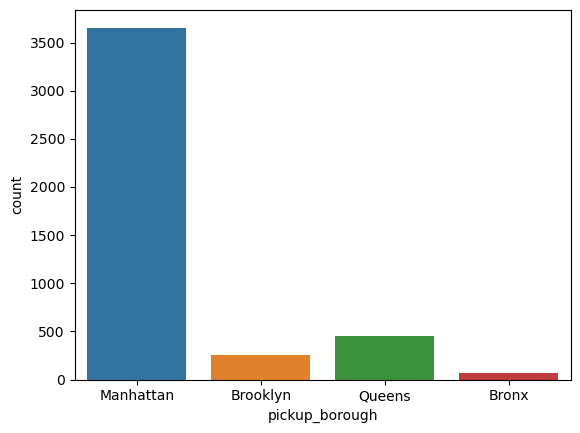

dropoff_borough
Manhattan        3614
Queens            380
Brooklyn          348
Bronx              95
Staten Island       1
Name: dropoff_borough, dtype: int64
Manhattan        81.433078
Queens            8.562416
Brooklyn          7.841370
Bronx             2.140604
Staten Island     0.022533
Name: dropoff_borough, dtype: float64


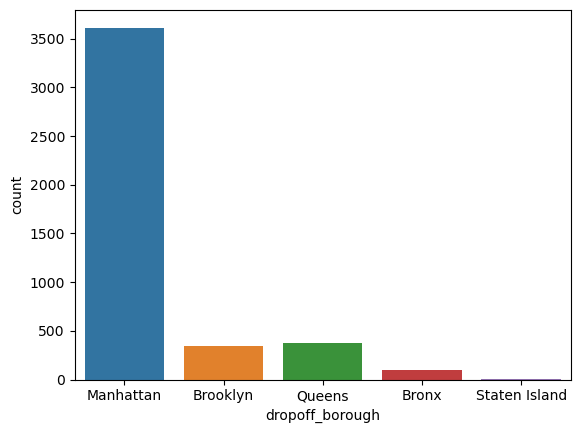

color_yellow
1    3761
0     677
Name: color_yellow, dtype: int64
1    84.745381
0    15.254619
Name: color_yellow, dtype: float64


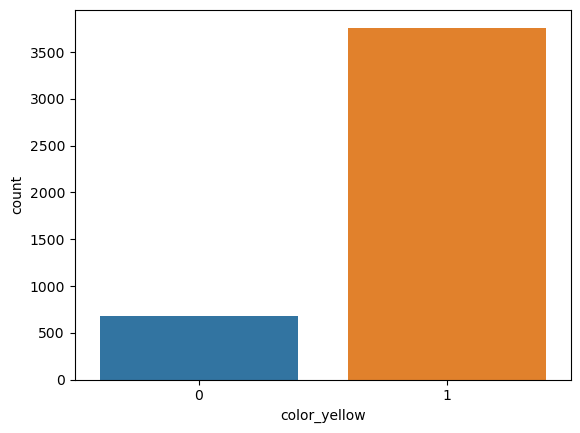

payment_credit_card
1    3171
0    1267
Name: payment_credit_card, dtype: int64
1    71.451104
0    28.548896
Name: payment_credit_card, dtype: float64


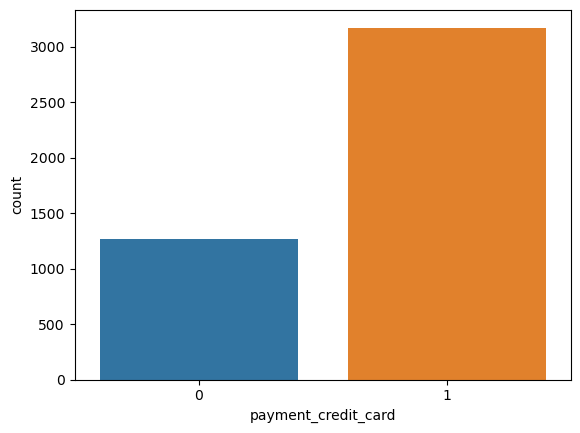

pickup_borough_Brooklyn
0    4180
1     258
Name: pickup_borough_Brooklyn, dtype: int64
0    94.186571
1     5.813429
Name: pickup_borough_Brooklyn, dtype: float64


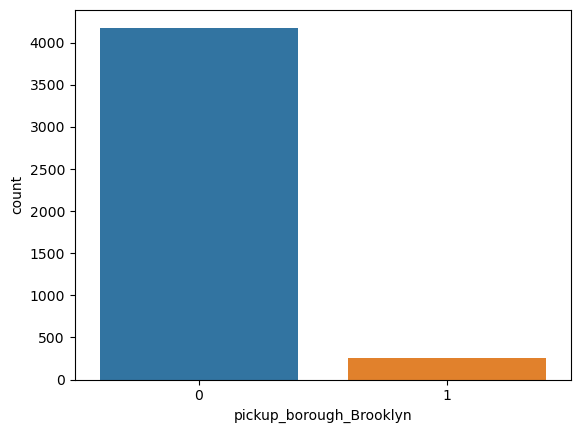

pickup_borough_Manhattan
1    3655
0     783
Name: pickup_borough_Manhattan, dtype: int64
1    82.356918
0    17.643082
Name: pickup_borough_Manhattan, dtype: float64


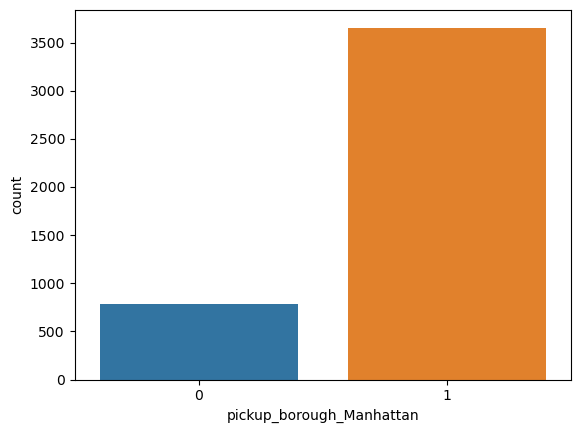

pickup_borough_Queens
0    3984
1     454
Name: pickup_borough_Queens, dtype: int64
0    89.770167
1    10.229833
Name: pickup_borough_Queens, dtype: float64


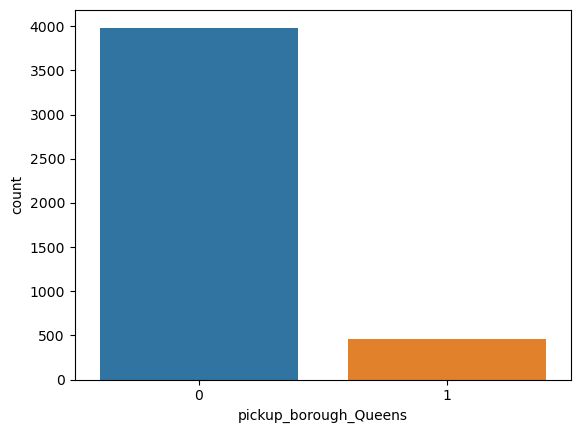

dropoff_borough_Brooklyn
0    4090
1     348
Name: dropoff_borough_Brooklyn, dtype: int64
0    92.15863
1     7.84137
Name: dropoff_borough_Brooklyn, dtype: float64


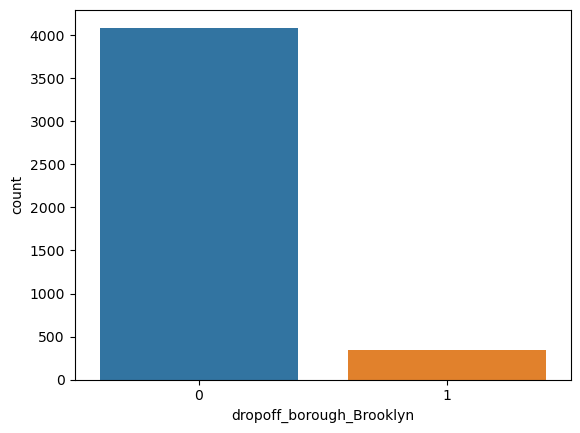

dropoff_borough_Manhattan
1    3614
0     824
Name: dropoff_borough_Manhattan, dtype: int64
1    81.433078
0    18.566922
Name: dropoff_borough_Manhattan, dtype: float64


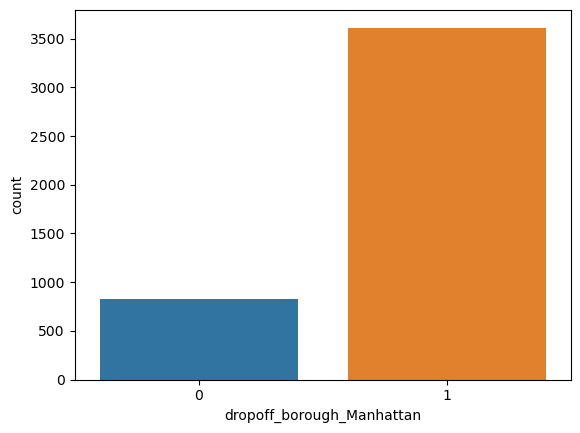

dropoff_borough_Queens
0    4058
1     380
Name: dropoff_borough_Queens, dtype: int64
0    91.437584
1     8.562416
Name: dropoff_borough_Queens, dtype: float64


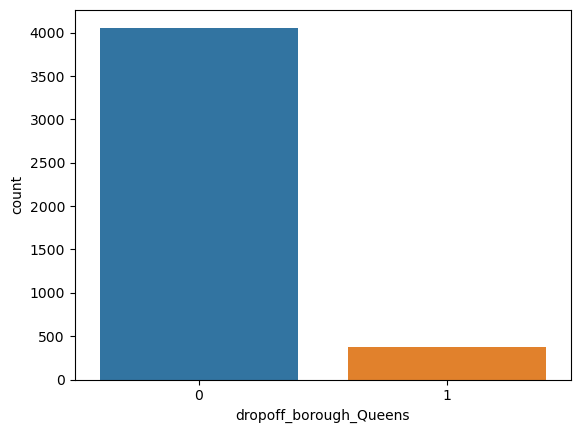

dropoff_borough_staten_island
0    4437
1       1
Name: dropoff_borough_staten_island, dtype: int64
0    99.977467
1     0.022533
Name: dropoff_borough_staten_island, dtype: float64


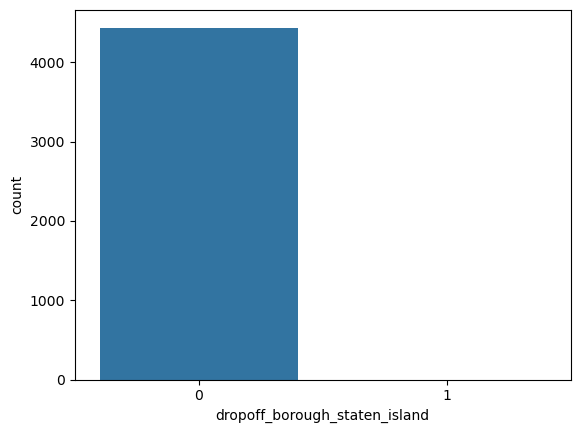

In [25]:
for col in cat_vars:
    print(col)
    print(train[col].value_counts())
    print(train[col].value_counts(normalize=True)*100)
    sns.countplot(x=col, data=train)
    plt.show()

passengers


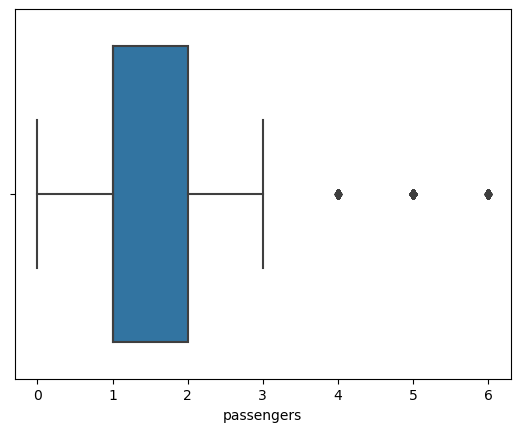

distance


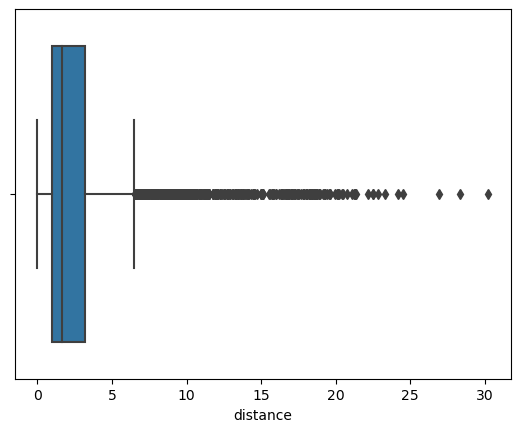

fare


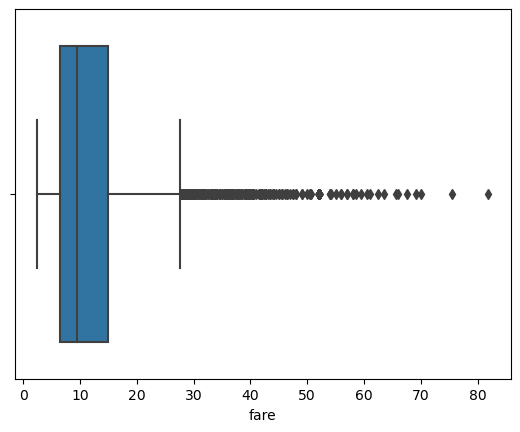

tip


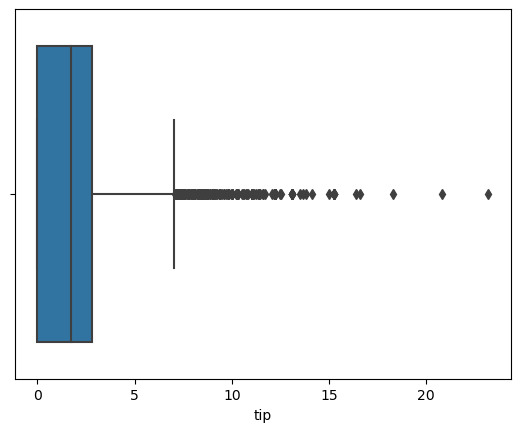

tolls


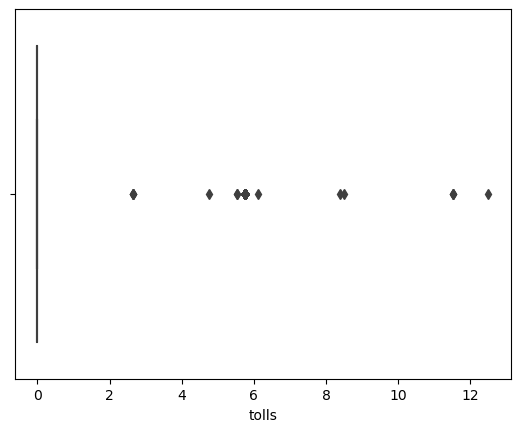

total


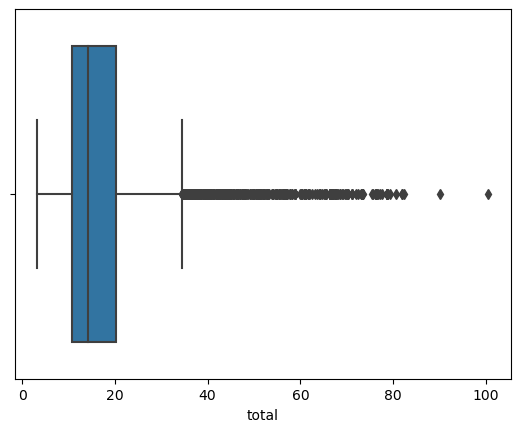

In [27]:
for col in num_vars:
    print(col)
    sns.boxplot(x=col, data=train)
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


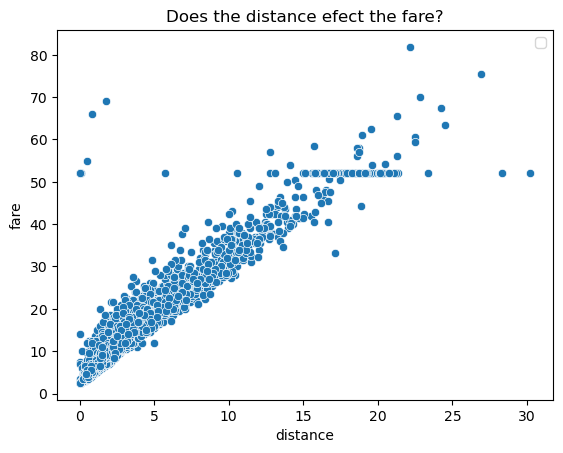

In [28]:
plt.title('Does the distance efect the fare?')
sns.scatterplot(x='distance', y='fare', data=train)
plt.legend()